# Analaysis of ATC/OTC patches:

## 1. Take all important patches with overlap > `OVERLAP_THRESHOLD` from ATC.

In [1]:
import pandas as pd
from datasets import Dataset, load_dataset

INPUTS = ['/home/jovyan/data/proteins_m1/export_ATCaseOTCase_10.csv',
          '/home/jovyan/data/proteins_m1/export_ATCaseOTCase_20.csv',
          '/home/jovyan/data/proteins_m1/export_ATCaseOTCase_40.csv']
OUTPUT = '/home/jovyan/data/analysis/atc_otc_alignments.pkl'

OVERLAP_THRESHOLD = 0.5

In [2]:
pd.options.display.max_colwidth = 500

atc_patches = []

for csv_input in INPUTS:
    df_tmp = pd.read_csv(csv_input)
    print(f'Patches of size={csv_input.split("_")[3].replace(".csv", "")}: {len(df_tmp)} ', end='')
    df_tmp = df_tmp.loc[df_tmp['overlap_pred'] >= OVERLAP_THRESHOLD]
    print(f'({len(df_tmp)} with reasonable overlap)')
    atc_patches += df_tmp['patch'].tolist()
    del(df_tmp)
    
print(f'All final patches: {len(atc_patches)} (distinct: {len(set(atc_patches))})')
atc_patches = list(set(atc_patches))

Patches of size=10: 445 (379 with reasonable overlap)
Patches of size=20: 445 (352 with reasonable overlap)
Patches of size=40: 445 (199 with reasonable overlap)
All final patches: 930 (distinct: 785)


## 2. Take all OTC samples - from test *(then from train as well?)*.

In [3]:
dss = load_dataset('EvaKlimentova/knots_AF')
dss = dss['test']
df = pd.DataFrame(dss)
df

Using custom data configuration EvaKlimentova--knots_AF-293560de9ceccb3f
Found cached dataset parquet (/home/jovyan/.cache/huggingface/datasets/EvaKlimentova___parquet/EvaKlimentova--knots_AF-293560de9ceccb3f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Domain_architecture,InterPro,Max_Topology,Max Freq,Knot Core,label,FamilyName
0,A0A0C1J7Q4,4,80.50,1,501,MIDALSEFHFIRAAWLLLLAPIGLLWWLIRPKPSKQANSASGIAPHLAEALQLGADDTRRIYPIDVAMIAAILIALAAAGPTWSRSPNPLVADTAPLVIALKVTDSMEEADLPPSRLERAKFKITDLINARADARTALIAYAGTPHRVAPLTEDANILRPLLEGLTPAVMPKPGDAASDALSVAETILSDSETPGAILFVLDDIDPSQVPGIEAATAPVFVLTMRPNGERVAQLDGLGNTTVVPFSEDDRDIARLQRVIHSAYSAALDDDDRLDWQDRGWILAWPAALLSLLWFRKGWVIRWAFLALLLIPPSGPAFAGGWRDWFLTPDQQGQIAMNQKRYADAADLFKDPYHKGYAHLKAGQYPEAAAIFAELDTPDAAFAEGMARIRNREYRPAISAFETALERQPDWPEAQHNLEVANAILAFVETTREQSDTGEEAGIGADDTVFDNEAGRGEDTTVQAPTDGAQALSADQWISTIDTDMQDFLRNRFLLEN...,501.0,PF13519;,IPR011990;IPR019734;IPR002035;IPR036465;,None,NaN,None,0,VIT
1,A0A3D9H7F7,4,95.06,1,168,MQLTHYNSSFKKQKHSITVICDNVTNAPNIGSLFRIADAFGIEQLIFCGSDIPLGKRMTKTSRSTEKYVNHSVEEDIESRIEILKASGFYLIALEITEKSQSLSEFKLQTNQPIALILGDENFGISDTILNQADAIIHINMYGNNSSMNVVQATGIALYEITKQLNAD,168.0,PF00588;,IPR029028;IPR004441;IPR001537;IPR029026;,3_1,0.834,"(93, 137)",1,SPOUT
2,A0A1J4RNW5,4,93.69,1,142,MKILAVGKIKESCILEGMHEYLKRMKGRIEIVEIKDSTKEKESIEITRKLEKLDRFLTVALDEHGKEMTSLEFSEFIKNNFNKNLCFIVGGPDGLDKSILEGVDHTLALSRMTFTHEMARLLLVEQLYRAFSIIDGKKYHRG,142.0,PF02590;,IPR029028;IPR003742;IPR029026;,3_1,0.716,"(60, 107)",1,SPOUT
3,A0A7R5L258,4,83.19,1,423,MWGVGGQGVLPALLLLPGLCAGFNIDVENPRVFRGPPESQFGYRVLQWGGDGDRGLLVGAPWDGDGQGDVYKCGVGPQNSSCAKANLGDTAPWLRGSAGHLGMTLVGSKDGGFVACAPLWSQECGTSVFSSGRCVRLDEELRLVETVAPTAQRCSTYMDIVLVLDGSNSIYPWEEVQDFLGNILGRFFIGPGQTQVGVLQYGEEVVQEWALGQHPTAQALLEAARNLTRQEGRETRTAMAIRQACAESFSAERGGRSGAARLLLVVTDGESHDGEELPAALAECEKRNITRYAIAVLGHYLRRQQDPEDFIREIKFIASDPDEKYFFNVTDEAALNDIVDALGDRIFSLEGTREDNESAFELEMSQIGFSIHLLEDGILFGMVGAYDWEGGVLEESRRGRIIPPREAFQGEFPLELKNHAAYL,423.0,PF00092;,IPR013519;IPR028994;IPR002035;IPR036465;,None,NaN,None,0,VIT
4,A0A842KII6,4,94.88,1,344,MKVIVYRYGHRIERDKRMTTHVALAARAFGADGIFVDRKDEELEKRIRKVIERFGGNFFIESGIDWKKLIKEWNGKIIHLTMYGEKIENVIEEIKKFENILVIVGSEKVPGEFYEISDYNVAIGNQPHSEVSSIAIFLHMLNGGEWMKRNFGGVIKIIPSKKGKKLSYNYLKILEKEGCSKDVIEHCKKVRDLAIKIAEKIAENGINLDMEAIEAGAILHDVGRAKRNDLMHVVEGVKIAKKYGLPKKVVAIIERHVGSGIDEEDAERLGLPKKDYIPKSIEEEIVSHADNLTSNGYRNIEEAINEFKKFGDKQVKKLIETHEKLSKFAGLDIDRIVDGLKPSK,344.0,PF01966;PF01994;,IPR029028;IPR003607;IPR006674;IPR006675;IPR029026;IPR002845;,3_1,0.900,"(79, 121)",1,SPOUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39407,A0A672HYG6,4,78.62,1,774,SKQPCLCGGNISGCDCVSPSVPLKSIEVELEVRDHVATVVSTLNYQNKEDKPIEAVFVFPLPGDAAVCHFSAKMGQKEIVAEVKEKQEAREEYDDALSSGQQAFLLEESDQSPDVFSMRVGCLPPGESASIRLEYVTELAVQADEGLRFCLPAVLNPRYTPQGRKTSEKLIHPGELCSSLSGSLQSVFSARVSSPRPISKVESSCSLDPLQFLNTDQTQATVKLGAGHKFDRDVEVLIYYKDAHQPTAVVEAGQASAKPGTLMGDPVVMVSLFPEFPQSAKSSVASCGEFVFLVDRSGSMDFPMNNKDRNQTRIISARETLLLLLKSLPMGCYFNIYSFGSSFEHIFPKSVKYGQKTMEEALKRVGTMVADLGGTEILEPLKRIYKQPCIPSHPRQLFVFTDGEVGNTKEVIDLVKKNSGSHRCFSFGIGEGASSALINGLAKEGGGHAQFITGSDRMQPKVMQSLRFALQPAVVDISITWDLPKDVSVTVLSPPI...,774.0,PF08487;PF13768;,IPR013694;IPR002035;IPR036465;,6_3,0.812,"(60, 622)",1,VIT
39408,A0A1F9XMW4,4,77.31,1,578,MELFRYPVELFWLAAGFAALCIFYFKARAASERVALELMDLRQLIRLSGANAIARKKTRDWLYLAALAFLLAAAGGPQWGVEMAPVTDLNGSLVVAVDASASMRAKDLKPSRMENAKLMLAALADKFQDYRVGIIAFSGDAYVQCPLTTDSDAIKYFLSYLAPGILPAPGTDIAAAITEAERMLGKYSGQKVLVLITDGEDLEEKVDEALNSAAAVNLKIFTVGMGKAEGEVIPVSDQGGNFIEYKKDSAGKTVVTKLNEGILLKIAQKTGAEYIRYGGNPETTAEEIRATVARIALSKTKGFGKASYKNRYQAPLFIAFLLFLIELMFMEKGFSAPKLLTRLFFRFRKAPVSFLLAALALSAVVPGKALAASPENLARQGNTAYDKKDFPKAYEYYSKALEKKPKNSRVLFNRGAAFYRMEDYAKAAEDFEEAGKTAKIKSMAGYNAGNAYFKLSDFPKAIEKYREAILADPGNKDARYNLQRALEEQKKNRNKC...,578.0,PF07719;PF13519;,IPR011990;IPR013105;IPR019734;IPR002035;IPR036465;,None,NaN,None,0,VIT
39409,A0A2W5N1I1,4,93.44,1,297,MKHFLELSDIPAATLREILDNAHALKKDKYAPPQILEGLSLAMMFDKRSTRTRVSFEVAMKQLGGHTIVMGMNEMQIGGAESIEDTAKVLSRFVDAVMIRISDQDTLYELAKHAGVPVINGMTDYSHPCQIMADLMTIEEKLGSIKGKKIAWFGDYNNVARTFVQASKKFEFDFIVAIPPALQMKADMNAVSTADPAFAAKDADVLVTDTWVSMGQEGKDIEQFRPYQVNAKLMELAKPHAIFMHCMPIHQGEEVADEVLKSSASVIYDEAENRLHAQKAILAYCLKESGVRIKRAA,297.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR00

In [4]:
df = df.loc[df['FamilyName'] == 'ATCase/OTCase']
df = df.loc[df['label'] == 0]
df

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Domain_architecture,InterPro,Max_Topology,Max Freq,Knot Core,label,FamilyName
21,A0A371KX32,4,96.12,1,163,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,163.0,PF00185;,IPR006130;IPR036901;IPR006131;IPR002292;,None,NaN,None,0,ATCase/OTCase
29,A0A540VL62,4,91.00,1,330,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA,330.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR002082;IPR006131;,None,NaN,None,0,ATCase/OTCase
39,A0A355W0X2,4,95.94,1,327,MDLKGRDFLKLLDFTPEEIEYLLNLAADLKDKKKKGIPVDTLRGKNVALIFEKTSTRTRCAFEVAAHDLGMGTTYLDPTGSQIGKKESIADTARVLAGMFEGIEYRGFGQDIVEELAKYSKVPVWNGLTNEFHPTQMLADLLTIREHFGHLKGIRMTYMGDARYNMGNSLMVACAKMGMHFTACTTAKYFPAKELVAECEAIAAQTGGSITLTEDVKAGTKDVDVIYTDVWVSMGEPDEVWTERIKELSPYQVNKAVMDNAGEQAIFMHCLPAFHDLKTKIGAQMGERFGITEMEVTDEVFESGQSLVFEEAENRMHTIKAVMAATL,327.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;IPR024904;,None,NaN,None,0,ATCase/OTCase
40,A0A4R6R6L5,4,93.88,1,311,MTTPRHFLDLTDLDGATLRGILDGAAAIKAELKASGRGTRRGEGPLAGKVLAMVFERPSTRTRVSFDVGMRQLGGETLMLTGDEMQLGRGETIADTARVLSRYVDAVMIRILDHAALAELAANASVPVINGLTRLSHPCQIMADVMTFEEHRGPIAGRKVAWTGDSNNVLASWIHASARFGFEMRVATPPELAPRREVVDWARANGAIVHVTTDAYEAVDGVDCVVTDTWVSMGDDDAERRHNLLAPYQVNDRLMAAADPEAVFMHCLPAHRDEEVTGSVMDGPQSIVFDEAENRLHAQKGILAWCLGAIG,311.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;IPR024904;,None,NaN,None,0,ATCase/OTCase
41,A0A4Q8ACK1,4,92.75,1,320,MKHLLSTYDLGRADAVRILDVAEEMATVGTREIKKLPALRGRTVATLFFEDSTRTRISFEAAAKRLSADVINFAAKGSSVSKGESLKDTAQTLEAIGAEAVVIRHGASGAAARLASTDWISSAVINAGDGTHEHPTQALLDAFTLRQHWAKVQGVDPLGTGLDGMSVVIVGDVLHSRVARSNLWLLKTLGADVTFVAPPTLLPIGADAWPCTINYDLDDALAAGPDAVMMLRVQAERMNAAYFPSTAEYSRRWGFDDARLAALDARGLENTIILHPGPMNRGLEISSGAADSPRAVVLQQVSNGVAVRMAVLYLLLSGDH,320.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR002082;IPR006131;,None,NaN,None,0,ATCase/OTCase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39381,A0A1D6HMG0,4,92.62,1,238,MKVLNRAIEVKALIKSGDKSFQPFKGKTMVMIFAKPSMRTRVSFETGFFLLGGHAIYLGPDDIQMGLCVVMLLEYFSGYNDIIMARVFAHQDILDLAKYASVPVINGLTDYNHPCQIMADALTMLEQIGRIENTKVFYVGDGNNIVHSWLLLADVLPFHFVCACPKGFEPDAHTVEMARGAGISKIEITNRPREAVKGADIVYTDVWASMGQKEEVDYRKQKFQGFTVDETLMEIAGP,238.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;,None,NaN,None,0,ATCase/OTCase
39384,A6EQZ9,4,91.44,1,313,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ,313.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR002082;IPR006131;,None,NaN,None,0,ATCase/OTCase
39400,A0A212J6D6,4,95.19,1,300,MTRHFSSIRELGRDAAHRLIKRAKEMKDTKFRSTLLDGKTVVLIFEKASTRTRLSFEVAVRQLGGTTIFMTPAESQLGRSEPLSDTARVISRYNDGMVVRTFGQEKLDALMQYGSVPVVNALTDQGHPCQVMGDVLTIYERTPDFSKLRVAWVGDGNNMANSWIEAAIHFPFELALAVPQGYEPDMALFAFAKQQGAKVTLDNDPQKAVAGAHYVNTDVWASMGQEQEQLLREEAFRGFCVDAGLMALAAPGAKFMHCLPAHRGEEVTEDVLESPNSVVFDQAENRLHIQKAVLEWVFTA,300.0,PF00185;PF02729;,IPR006132;IPR006130;IPR036901;IPR006131;IPR002292;IPR024904;,None,NaN,None,0,ATCase/OTCase
39401,A0A6J7TAE8,4,95.38,1,166,MGNSLLVTSALLGADIRIASPKALWPAADVQEIAQGLLAKSGGSILLTEDMDEALPGSDFIHTDVWVSMGESEEVWKERVELLGSYQVNDVALAKTGNANAKFMHCLPGFHNEQTTVGREIANKTGMHDGLEVTHDVFESEASVVFDQAENRLHTIKAIMVATIGD,166.0,PF00185;,IPR006130;IPR036901;IPR006131;IPR002292;,None,NaN,None,0,ATCase/OTCase


In [5]:
otc_ids = df['ID'].tolist()
len(otc_ids)

3352

## 3. Look for similarities between the two sets (```n^2``` complexity)

- **global alignment** - finds the best concordance between all characters in two sequences

- **local alignment** - finds just the subsequences that align the best

Can be specified:

`match score` = compatibility between an alignment of two characters in the sequences (highly compatible characters should be given positive scores, and incompatible ones should be given negative scores or 0)

`gap penalties` = should be negative

---

Function `localXY`: 

```
X: parameters for matches (and mismatches)
where X can be: x     no params, identical characters score = 1, otherwise = 0
                m     match score == score of identical chars, otherwise mismatch score
                d     dictionary for score of any pair of characters
                c     callback function that returns scores
Y: parameters for gap penalties
                x     no gap penalties
                s     same open and extend gap penalties for both sequences
                d     different open and extend gap penalties
                c     callback function
```

In [6]:
combinations = df[['ID', 'uniprotSequence']]
print(f'Now we will calculate local alignments of {len(atc_patches)} patches with {len(combinations)} sequences ({len(atc_patches) * len(combinations)} comparisons).')
combinations = combinations.set_index('ID')
combinations.reset_index()
combinations

Now we will calculate local alignments of 785 patches with 3352 sequences (2631320 comparisons).


,uniprotSequence
ID,
A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA
A0A540VL62,MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA
A0A355W0X2,MDLKGRDFLKLLDFTPEEIEYLLNLAADLKDKKKKGIPVDTLRGKNVALIFEKTSTRTRCAFEVAAHDLGMGTTYLDPTGSQIGKKESIADTARVLAGMFEGIEYRGFGQDIVEELAKYSKVPVWNGLTNEFHPTQMLADLLTIREHFGHLKGIRMTYMGDARYNMGNSLMVACAKMGMHFTACTTAKYFPAKELVAECEAIAAQTGGSITLTEDVKAGTKDVDVIYTDVWVSMGEPDEVWTERIKELSPYQVNKAVMDNAGEQAIFMHCLPAFHDLKTKIGAQMGERFGITEMEVTDEVFESGQSLVFEEAENRMHTIKAVMAATL
A0A4R6R6L5,MTTPRHFLDLTDLDGATLRGILDGAAAIKAELKASGRGTRRGEGPLAGKVLAMVFERPSTRTRVSFDVGMRQLGGETLMLTGDEMQLGRGETIADTARVLSRYVDAVMIRILDHAALAELAANASVPVINGLTRLSHPCQIMADVMTFEEHRGPIAGRKVAWTGDSNNVLASWIHASARFGFEMRVATPPELAPRREVVDWARANGAIVHVTTDAYEAVDGVDCVVTDTWVSMGDDDAERRHNLLAPYQVNDRLMAAADPEAVFMHCLPAHRDEEVTGSVMDGPQSIVFDEAENRLHAQKGILAWCLGAIG
A0A4Q8ACK1,MKHLLSTYDLGRADAVRILDVAEEMATVGTREIKKLPALRGRTVATLFFEDSTRTRISFEAAAKRLSADVINFAAKGSSVSKGESLKDTAQTLEAIGAEAVVIRHGASGAAARLASTDWISSAVINAGDGTHEHPTQALLDAFTLRQHWAKVQGVDPLGTGLDGMSVVIVGDVLHSRVARSNLWLLKTLGADVTFVAPPTLLPIGADAWPCTINYDLDDALAAGPDAVMMLRVQAERMNAAYFPSTAEYSRRWGFDDARLAALDARGLENTIILHPGPMNRGLEISSGAADSPRAVVLQQVSNGVAVRMAVLYLLLSGDH
...,...
A0A1D6HMG0,MKVLNRAIEVKALIKSGDKSFQPFKGKTMVMIFAKPSMRTRVSFETGFFLLGGHAIYLGPDDIQMGLCVVMLLEYFSGYNDIIMARVFAHQDILDLAKYASVPVINGLTDYNHPCQIMADALTMLEQIGRIENTKVFYVGDGNNIVHSWLLLADVLPFHFVCACPKGFEPDAHTVEMARGAGISKIEITNRPREAVKGADIVYTDVWASMGQKEEVDYRKQKFQGFTVDETLMEIAGP
A6EQZ9,MELSVDHLLGIKYIKEADIQLIFETADHFKEVINRPIKKVPSLRDITIANLFFENSTRTRLSFELAEKRLSADVVNFSAASSSVKKGETLIDTVNNILSMKVDMVVMRHPNPGAGVFLSKHVGAKIINAGDGAHEHPTQALLDSYSIRERLGDVAGKKVVIVGDILHSRVALSNIFALKKLGAEVKVCGPKTLMPKHIESLGVVYEPSLIKALNWCDVANMLRVQNERMDISYFPSTREYTQQYGVNKKILSSLDKEIVLMHPGPINRGVEITSDVADSKQAIILDQVQNGVAVRMAVIYLLASKINRGNVAQ
A0A212J6D6,MTRHFSSIRELGRDAAHRLIKRAKEMKDTKFRSTLLDGKTVVLIFEKASTRTRLSFEVAVRQLGGTTIFMTPAESQLGRSEPLSDTARVISRYNDGMVVRTFGQEKLDALMQYGSVPVVNALTDQGHPCQVMGDVLTIYERTPDFSKLRVAWVGDGNNMANSWIEAAIHFPFELALAVPQGYEPDMALFAFAKQQGAKVTLDNDPQKAVAGAHYVNTDVWASMGQEQEQLLREEAFRGFCVDAGLMALAAPGAKFMHCLPAHRGEEVTEDVLESPNSVVFDQAENRLHIQKAVLEWVFTA


In [7]:
from Bio import pairwise2
from Bio.Seq import Seq

# https://www.geeksforgeeks.org/biopython-pairwise-alignment/
# https://biopython.org/docs/1.75/api/Bio.pairwise2.html


# def get_global_alignment(patch, seq):
#     return pairwise2.align.globalxx(patch, seq)


# no special penalties:
def get_local_alignment(patch, seq):
    alignment = pairwise2.align.localxx(patch, seq, one_alignment_only=True)[0] #, score_only=True)
    return alignment.score, alignment


# penalties for gaps: -0.5 when opening a gap, -0.5 when extending the gap
def get_local_alignment_penalised(patch, seq):
    alignment = pairwise2.align.localxs(patch, seq, -0.5, -0.5, one_alignment_only=True)[0] #, score_only=True)
    return alignment.score, alignment


alignments_tst = get_local_alignment('VLADMMTIQERFGNPRKLKVAISWAYATSHAKPLSVPQSQ', 'MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA')
#alignments_tst = get_local_alignment('DQRRVVLCWAYHPKPLPMAV', 'MVDSNAKVTLKDVGQQPGHNRDNGFYGQDIISVSQFDRTRLEYIFNVAHEMRVLVERFGSADLLQGKILANLFYEPSTRTSSSFMAAMLRLGGQVIPINNVQYSSVTKGESLPDTVRTLECYADVIVLRHPEVGSAATAARYASKPVINAGDGVGEHPTQALLDHFTIVEELGGVDGLKVAMVGDLKYGRTVHSLTKLLTNYDVEFVFVSPDILRMPEDVLDVVRASGHRFTVTEDVHDVIGEVDVLYVTRVQKERFSDLAEYDRVKDQYVVDPELMQRAKERMIVMHPLPRVNEISYAVDDDPRAAYFRQMRNGMYIRMALLAAVLGRA')
alignments_tst

/home/jovyan/my-conda-envs/autoencoder/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


(20.0,
 Alignment(seqA='VLADMMTI-QE--R------F-G---NPRK--L------KV-----A-----I---------S--WAY--ATS----HA-KP-LS-VPQSQ-', seqB='-----M--GQEGQRHEKLQAFEGFQLN---EGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVW--EQA--ENRLHAQK-GL-IVELLDA', score=20.0, start=5, end=87))

In [8]:
from Bio.pairwise2 import format_alignment

# since Biopython 1.71 identical matches are '|', mismatches are '.', and gaps are ' ':
print(format_alignment(*alignments_tst[1], full_sequences=True))

VLADMMTI-QE--R------F-G---NPRK--L------KV-----A-----I---------S--WAY--ATS----HA-KP-LS-VPQSQ-
     |   ||  |      | |   |     |      ||     |     |         |  |    |      || |  |  |     
-----M--GQEGQRHEKLQAFEGFQLN---EGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVW--EQA--ENRLHAQK-GL-IVELLDA
  Score=20



In [9]:
print(format_alignment(*get_local_alignment_penalised('VLADMMTIQERFGNPRKLKVAISWAYATSHAKPLSVPQSQ', 'MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCLPAHRGEEITGDVLEGEQSLVWEQAENRLHAQKGLIVELLDA')[1], full_sequences=True))

---------------------------------VLADMMTIQERFGNPRKLKVAIS--WAYATS--HA-KPLSVPQSQ-
                                  | ......|..|  ..|....|  |..|..  || |.|.|     
MGQEGQRHEKLQAFEGFQLNEGLLSGTDAKVMHCL-PAHRGEEITG--DVLEGEQSLVWEQAENRLHAQKGLIVELLDA
  Score=8



Parallel computation:

In [10]:
def calculate_alignments(seq_id):
    seq = combinations.loc[seq_id]['uniprotSequence']
    results = []
    
    for patch in atc_patches:
        alignment_score, alignment_obj = get_local_alignment(patch, seq)
        alignment_score_p, alignment_obj_p = get_local_alignment_penalised(patch, seq)
        results.append({'patch': patch, 
                        'seq_id': seq_id, 
                        'seq': seq, 
                        'alignment_score': alignment_score, 
                        'alignment_obj': alignment_obj,
                        'alignment_score_p': alignment_score_p, 
                        'alignment_obj_p': alignment_obj_p})
            
    return results

In [11]:
from datetime import datetime
from multiprocessing import Pool
from tqdm import tqdm

# https://stackoverflow.com/questions/41920124/multiprocessing-use-tqdm-to-display-a-progress-bar

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
with Pool(32) as pool:
    alignments = list(tqdm(pool.imap(calculate_alignments, otc_ids), total=len(otc_ids)))

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 13:34:08.


100%|██████████| 3352/3352 [55:19<00:00,  1.01it/s]  


Done at 14:29:28.


In [12]:
dfs = []
for patch_result in alignments:
    dfs.append(pd.DataFrame(patch_result))
df_alignments=pd.concat(dfs, ignore_index=True)
df_alignments.to_pickle(OUTPUT)
df_alignments

,patch,seq_id,seq,alignment_score,alignment_obj,alignment_score_p,alignment_obj_p
0,DFVYVKNWSA,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,9.0,"(-------D-F--V---------------------------------Y-----V-----------------KN-------------W-S---------------------------------------------------------------------------A, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPK-DAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 9.0, 7, 164)",4.5,"(-----------------------------------------------------------------------------DFVYVKNW-SA---------------------------------------------------------------------------, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 4.5, 77, 87)"
1,DGADFIYAKNWASYTDYGKI,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,16.0,"(-------DG-----A----D-------F-IY-AKNWA------------SY-----------------T--D------------Y-------G-------K--------------------------------I---------------------------------, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVI-GA---AMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 16.0, 7, 134)",6.0,"(--------------------------------------------------------------------------DGADFIYAKNWASYTDYGKI---------------------------------------------------------------------, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 6.0, 74, 87)"
2,FVLSWANHPH,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,10.0,"(------F-----V-----------------------L--------S--------------------------------------W-------------A-------N------------H--P---------------------------H------------, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 10.0, 6, 151)",3.5,"(------------------------------------------------------------------------------------------------------------------------------------------FVLSW--A-NHPH------------, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 3.5, 140, 151)"
3,VSIIWAFATS,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,10.0,"(------------V-------------S--I-----------------------------------I------------------W-------------A-F----------A------------------T--------S-----------------------, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 10.0, 12, 140)",3.0,"(----------------------------------VSIIWAFATS-----------------------------------------------------------------------------------------------------------------------, LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA, 3.0, 34, 43)"
4,ADFVYAKNWA,A0A371KX32,LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA,10.0,"(-----A-D-F--V---------------------------------Y----A------------------K-----------------------------------N-----------------------------------

In [13]:
# df_alignments = pd.read_pickle(OUTPUT)
# df_alignments

### Check the default `alignment_score`:

In [15]:
df_alignments['patch_len'] = df_alignments.apply(lambda row: len(row['patch']), axis=1)

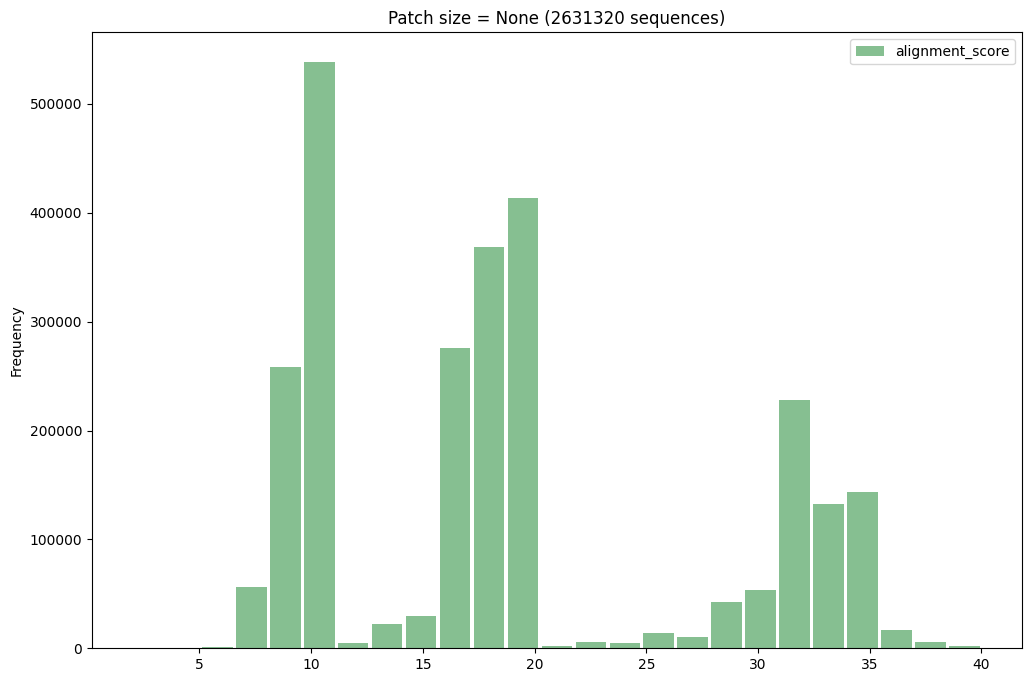

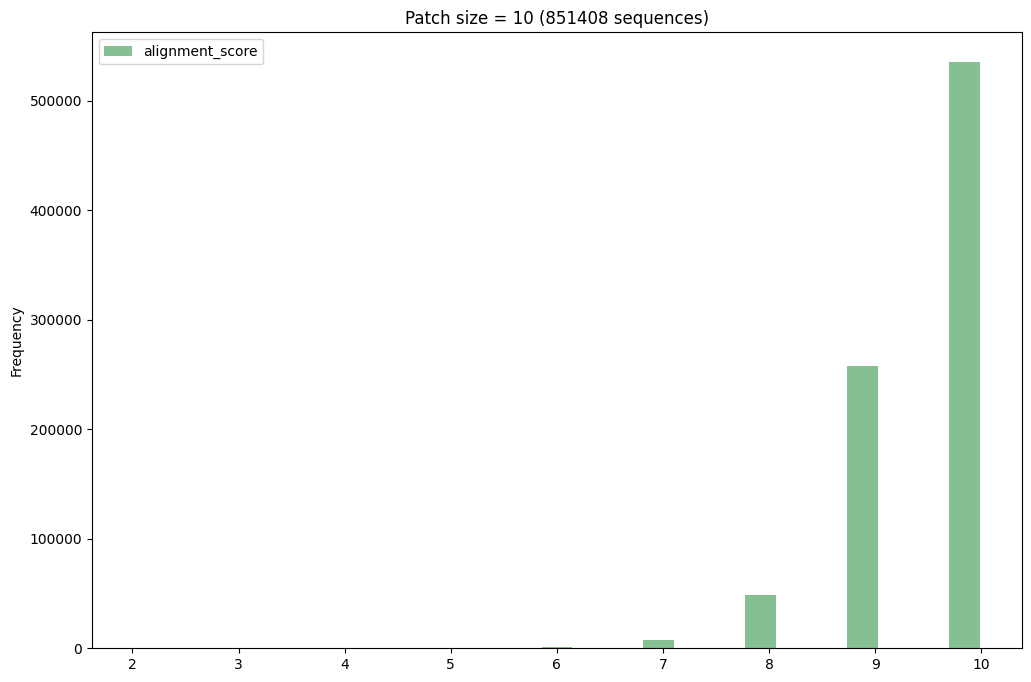

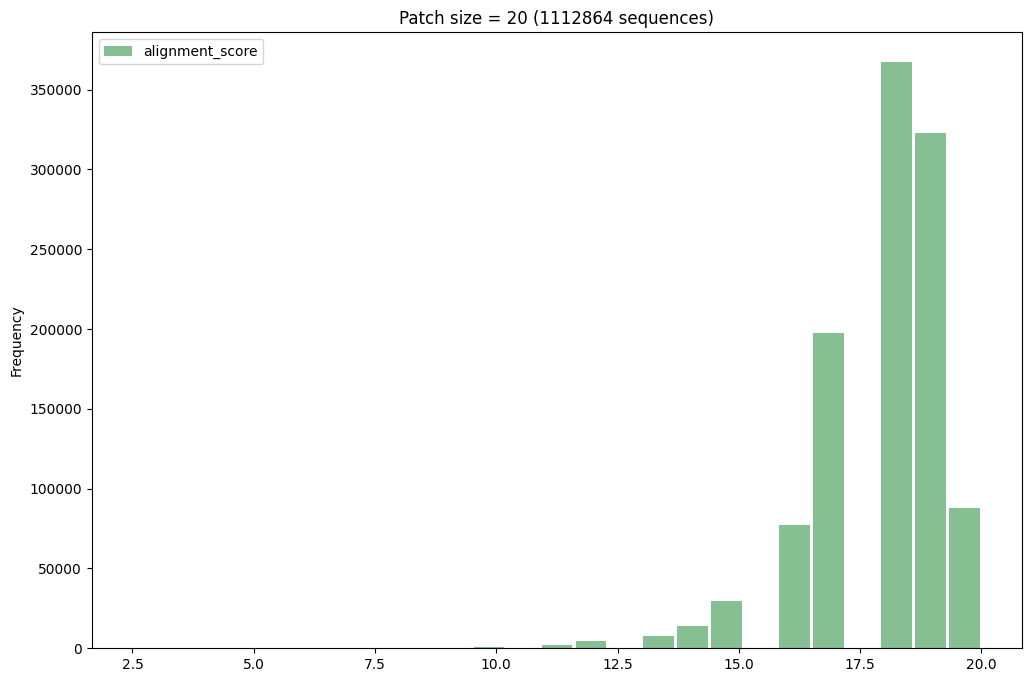

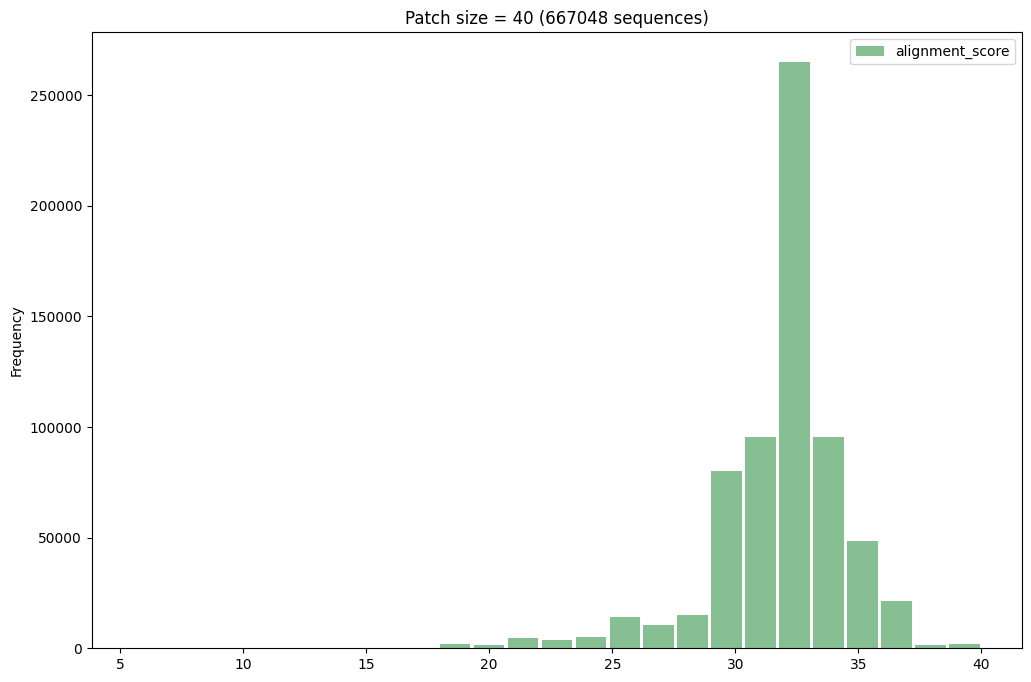

In [16]:
import matplotlib.pyplot as plt

def display_patch_histogram(column, patch_size=None):
    if patch_size:
        df_tmp = df_alignments.loc[df_alignments['patch_len'] == patch_size].copy()
    else:
        df_tmp = df_alignments.copy()
    sequences_count = len(df_tmp)
    df_tmp.plot(kind='hist', column=column, bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9, title=f'Patch size = {patch_size} ({sequences_count} sequences)')
    del(df_tmp)

display_patch_histogram('alignment_score')
display_patch_histogram('alignment_score', 10)
display_patch_histogram('alignment_score', 20)
display_patch_histogram('alignment_score', 40)

Take a look into the results more (it's not very useful without the gap penalisation):

In [32]:
set_size = len(df_alignments.loc[df_alignments['patch_len'] == 10])
indices = df_alignments.loc[(df_alignments['alignment_score'] >= 10) & (df_alignments['patch_len'] == 10)].index
patch_set_size = len(indices)
percent = (patch_set_size * 100) / set_size

print(f'Interesting results for patch=10 with overlap >= 8: {patch_set_size}/{set_size} ({percent:.3} %)\n\n')

interesting_alignment = df_alignments.iloc[indices[0]]
print(f'Alignment of patch-sequence pair from index {indices[0]}:')
print(format_alignment(*interesting_alignment['alignment_obj'], full_sequences=True))

Interesting results for patch=10 with overlap >= 8: 535824/851408 (62.9 %)


Alignment of patch-sequence pair from index 2:
------F-----V-----------------------L--------S--------------------------------------W-------------A-------N------------H--P---------------------------H------------
      |     |                       |        |                                      |             |       |            |  |                           |            
LTIEEAFDGFDDVQAAWVGDGNNVGQSFVIGAAMVGLDLTVATPVSYGMDDAVLEQAAALGHPPTIVDDPKDAVDDADVVYTDVWISMGQEDQRHEKLAAFDGYQVNERLLADSDAQVMHCLPAHRGEEITGDVLESDRSLVWDQAENRLHAQKGLLVELLDA
  Score=10



In [17]:
print(f'Mean: {df_alignments["alignment_score"].mean()}')
print(f'Median: {df_alignments["alignment_score"].median()}')
print(f'Min: {df_alignments["alignment_score"].min()}')
print(f'Max: {df_alignments["alignment_score"].max()}')

Mean: 18.753337868446255
Median: 18.0
Min: 4.0
Max: 40.0


In [18]:
THRESHOLD = 38

In [19]:
df_alignments.loc[df_alignments['alignment_score'] >= THRESHOLD]

,patch,seq_id,seq,alignment_score,alignment_obj,alignment_score_p,alignment_obj_p,patch_len
3930,AMADLMTAMEYKGRLEGRKIVVSWAYSGGVKPVAVPQSAI,A0A7S2NYT9,MAAPTARAMATADWLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQLGGQAIFYSIGDSPLGVKESIEDTGRVLSRMCQGITARVKSRKDVRNLALVSSIPVINALDDYGHPMQMLADLQTIIEHKGTFEGIKMAYFGDVENNVTYDLMRLAALMGFTLNLAGVGTIEKSVWAEVKRLSENSGGKVEQFKTAQEAVAGVDVIYCDSWMSYGIPKEEEEARKKLFMPFQVDSVLLAQAKPDCIFMNCLPAARGMEQTAEVIDGPQSVVFDQAENRLHAQKALLVFLLAPRRFAEIVSV,39.0,"(-A------MA--D-L-M----T-------------A------------------M--------------------------E--Y-------KG------------R----LE-G----------------------------R-------------K-------------I-V-------------------------------------V-----------------------------S-WAY-----S---GG-V---K----------------------P---------------V-----A-----------------------V---PQS-----A----------------------I---, MAAPTARAMATADWLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQLGGQA...",13.0,"(-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------AM-ADLMTAMEYKGRLEGRKIVVSWAYSGGVKPVAVPQSAI----------------------------------------------------------------------------------------------------------------------------------------------------, MAAPTARAMATADWLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQL...",40
3939,ADIMTALEVMPKIRGKKFVVSYAYSGGLKPLAVPQSVALI,A0A7S2NYT9,MAAPTARAMATADWLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQLGGQAIFYSIGDSPLGVKESIEDTGRVLSRMCQGITARVKSRKDVRNLALVSSIPVINALDDYGHPMQMLADLQTIIEHKGTFEGIKMAYFGDVENNVTYDLMRLAALMGFTLNLAGVGTIEKSVWAEVKRLSENSGGKVEQFKTAQEAVAGVDVIYCDSWMSYGIPKEEEEARKKLFMPFQVDSVLLAQAKPDCIFMNCLPAARGMEQTAEVIDGPQSVVFDQAENRLHAQKALLVFLLAPRRFAEIVSV,38.0,"(-A----------DI---M----T-------------A---------------L-----------------------------E---------------------------V-----M---------------P---K--I----R-------G-----K--KF-V-----VS----------Y-------A------------------Y---------------------------------S------------GG--------------------------------------L--------------KP-------L-A---------V---PQSV----A---L------------------I---, MAAPTARAMATAD-WLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQLGG...",10.5,"(---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ADIM--TALEVMPKIRGKKFVVSYAYSGGL---KPLAV----PQSVALI---, MAAPTARAMATADWLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQLG...",40
4021,AMMLALKERMGDVAKRKMVLTWTWHPRPLNTAVANSALLI,A0A7S2NYT9,MAAPTARAMATADWLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQLGGQAIFYSIGDSPLGVKESIEDTGRVLSRMCQGITARVKSRKDVRNLALVSSIPVINALDDYGHPMQMLADLQTIIEHKGTFEGIKMAYFGDVENNVTYDLMRLAALMGFTLNLAGVGTIEKSVWAEVKRLSENSGGKVEQFKTAQEAVAGVDVIYCDSWMSYGIPKEEEEARKKLFMPFQVDSVLLAQAKPDCIFMNCLPAARGMEQTAEVIDGPQSVVFDQAENRLHAQKALLVFLLAPRRFAEIVSV,38.0,"(-A------M-------M-------L----------A---------------L-------K---------------------E----R----------------------------M---G---------D----V-------------------A--K-RK-----------------------M--------------------------V-------L---------T-------------W------------------T---------------WH-----P------R-----P------L-----------N----------TA-V-----------A-NS---A---LL-----------I---, MAAPTARAMATADWLGMHDNATSFLYSHGNQRQLRAVESNPPEIPKANARHLLTMCDLAKDDVLAIMRVALAMKKSRNAFTETGYDRFSDTLKGYSLLTLFEKPSLRTRVSLEVGMHQLGGQ...",10.5,"(-------AMMLALKERMGDVAKRKMVLTWTWHPRPLNTAVANSALL-I-------------------------------

### Check the penalised `alignment_score_p`:

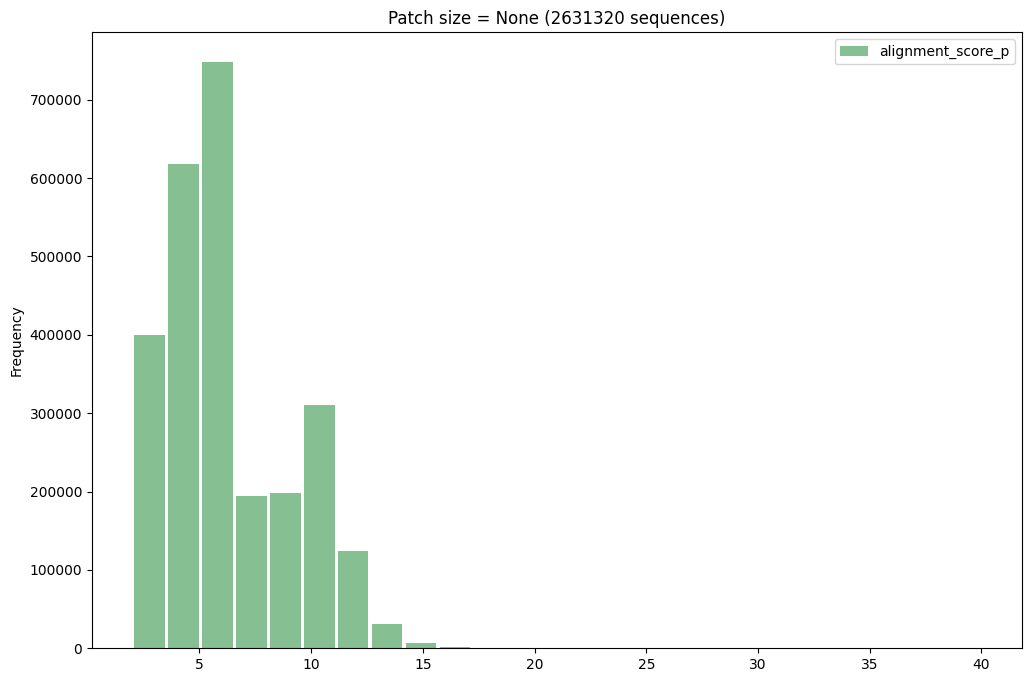

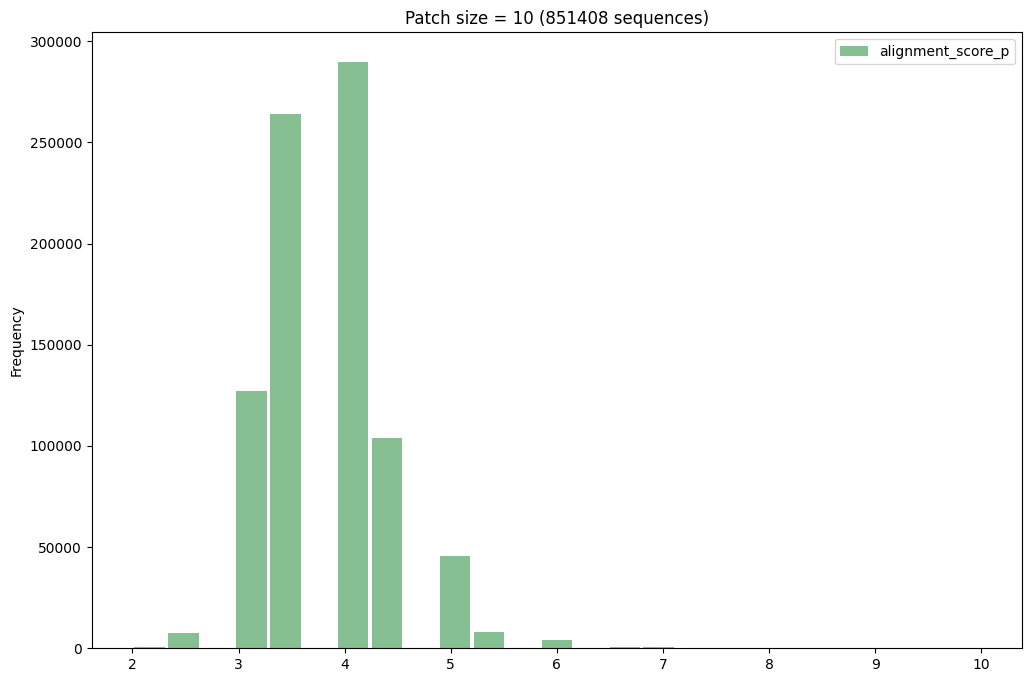

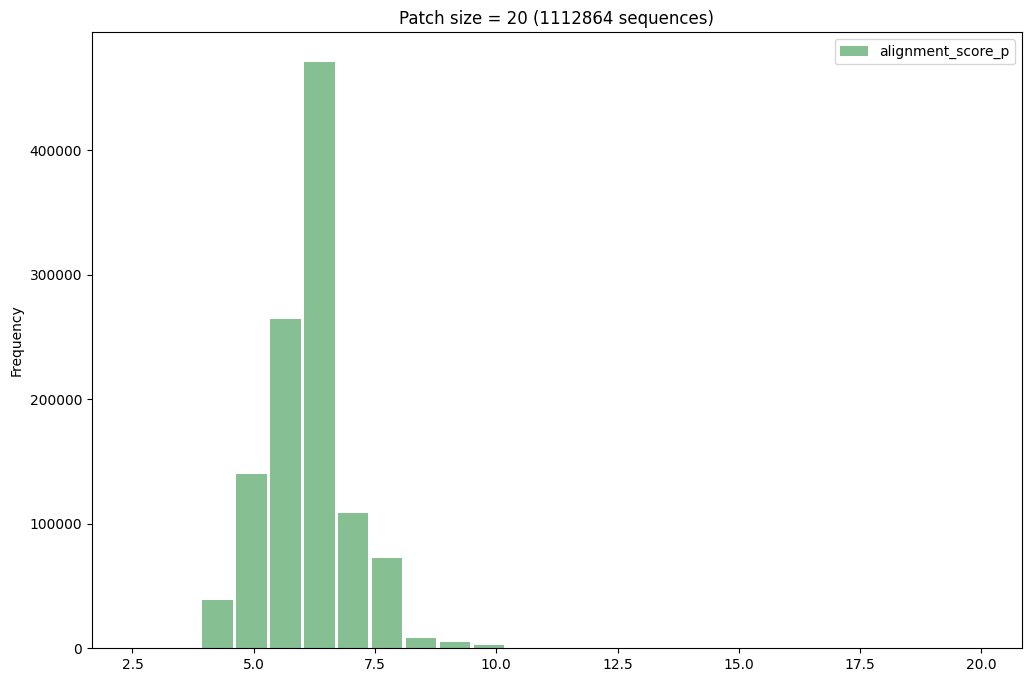

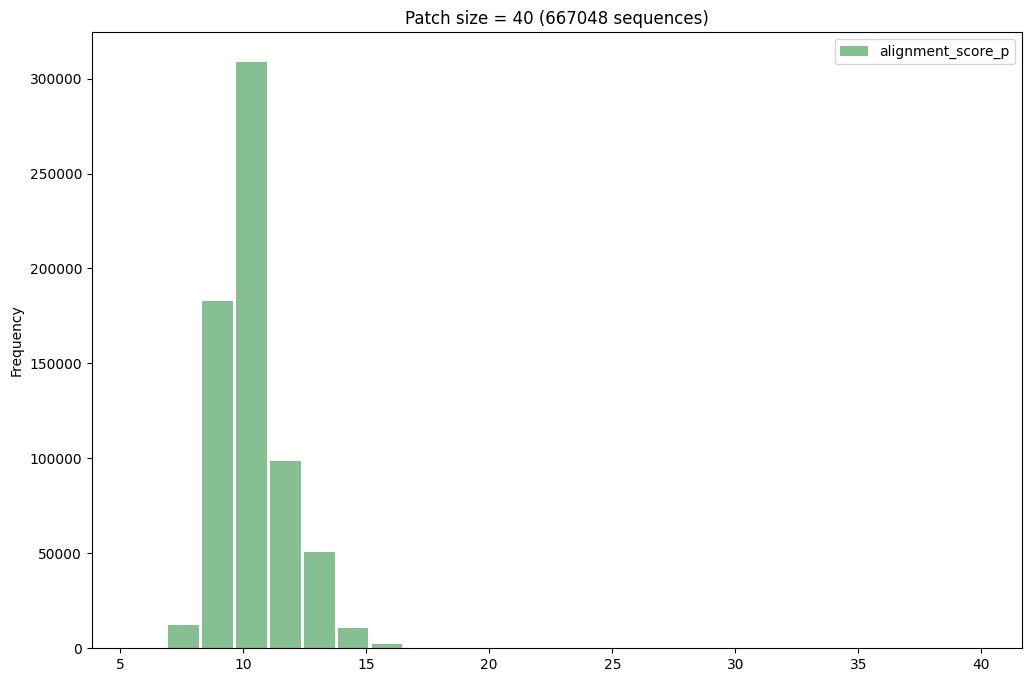

In [20]:
display_patch_histogram('alignment_score_p')
display_patch_histogram('alignment_score_p', 10)
display_patch_histogram('alignment_score_p', 20)
display_patch_histogram('alignment_score_p', 40)

In [21]:
print(f'Mean: {df_alignments["alignment_score_p"].mean()}')
print(f'Median: {df_alignments["alignment_score_p"].median()}')
print(f'Min: {df_alignments["alignment_score_p"].min()}')
print(f'Max: {df_alignments["alignment_score_p"].max()}')

Mean: 6.452603636197802
Median: 6.0
Min: 2.0
Max: 29.0


In [22]:
# THRESHOLD_P = 20

In [23]:
# len(set(df_alignments.loc[df_alignments['alignment_score_p'] > THRESHOLD_P]['seq_id'].tolist()))

In [24]:
# set(df_alignments.loc[df_alignments['alignment_score_p'] > THRESHOLD_P]['patch'].tolist())

In [25]:
# df_alignments['patch_len'] = df_alignments.apply(lambda row: len(row['patch']), axis=1)
# df_alignments.loc[(df_alignments['alignment_score_p'] > THRESHOLD_P) & (df_alignments['patch_len'] < 40)]

In [47]:
def display_big_overlaps(overlap, patch_size):
    set_size = len(df_alignments.loc[df_alignments['patch_len'] == patch_size])
    indices = df_alignments.loc[(df_alignments['alignment_score_p'] >= overlap) & (df_alignments['patch_len'] == patch_size)].index
    patch_set_size = len(indices)
    percent = (patch_set_size * 100) / set_size

    print(f'Interesting results for patch=10 with overlap >= 8: {patch_set_size}/{set_size} ({percent:.3} %)\n\n')

    for i in indices[:15]:
        interesting_alignment = df_alignments.iloc[i]
        print(f'Alignment of patch-sequence pair from index {i}:')
        print(format_alignment(*interesting_alignment['alignment_obj_p'], full_sequences=True))

display_big_overlaps(8, 10)

Interesting results for patch=10 with overlap >= 8: 99/851408 (0.0116 %)


Alignment of patch-sequence pair from index 30659:
-------------------------------------------------------------------------------------------------------------------------------------------------------------ALKDADFVYT----------------------------------------------------------------------------------
                                                                                                                                                             |.||||.|||                                                                                  
TFETGIYELGGHGIYLGPNDIQIGKRESVHDVAKNLGRWAHGIVIRTFSHSNVTAFAEAAEIPVINGLDDLLHPCQALTDLFTLKEQKGTLRGLTLAWVGDGNNVAHSLMWACVKSGVNMNLAVPDGYGPDSEITAKVQKEASSKGVVVRILRDPVEAVKDADAVYTDAWASMGQESEAEERKRIFKPYQVNARLMGESKPAALFMHCLPAHRGEEVSGDVIDSSRSIVFEQAENRLHVQKAIMLQLMK
  Score=8

Alignment of patch-sequence pair from index 37680:
-DFVYVKNWSA---------------------------------------------------

In [48]:
display_big_overlaps(14, 20)

Interesting results for patch=10 with overlap >= 8: 22/1112864 (0.00198 %)


Alignment of patch-sequence pair from index 37735:
LRDADFVYVKNWSTFNDYGR---------------------------------------------------------------------
   ||||||||||.|||.|                                                                      
---ADFVYVKNWSNFNDSGQVTNTDPNWTVTAEKMALTNNGKFMHCLPVRRNVIVSDEVLDGENSIVIEQANNRTYSAQLVLQKILKKM
  Score=14

Alignment of patch-sequence pair from index 38243:
LEDADFVYVKNWSGFNDYGK---------------------------------------------------------------------
   ||||||||||.|||.|                                                                      
---ADFVYVKNWSNFNDSGQVTNTDPNWTVTAEKMALTNNGKFMHCLPVRRNVIVSDEVLDGENSIVIEQANNRTYSAQLVLQKILKKM
  Score=14

Alignment of patch-sequence pair from index 407465:
KDADVVYPKSWGCLLTTNDQ------------------------------------------------------------------------
 ||||||.||||..|||.|                                                                         
-DADVVYAKSWGAMLTTTD

In [49]:
display_big_overlaps(20, 40)

Interesting results for patch=10 with overlap >= 8: 43/667048 (0.00645 %)


Alignment of patch-sequence pair from index 38022:
DCTIEYDQNKAFENADFVYVKNWSNFNDYGKVTNSDPNWT------------------------------------------------------------
              ||||||||||||||.|.|||.|||||                                                            
--------------ADFVYVKNWSNFNDSGQVTNTDPNWTVTAEKMALTNNGKFMHCLPVRRNVIVSDEVLDGENSIVIEQANNRTYSAQLVLQKILKKM
  Score=23

Alignment of patch-sequence pair from index 86439:
---------------------------------------------------------------------------------------------------------------------------------------QILADYLTIREKFGDT-KGLKLGVSWTSAP-NYVRPLSVPQS------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                                       |.|||.|||||.|| | ||||| |....|. |....|.